In [47]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.datasets import make_imbalance
import os
import pandas as pd
import seaborn as sns

In [48]:
from collections import Counter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [74]:
all_feature145_names = ['t-Mean-1',
 't-Mean-2',
 't-Mean-3',
 't-STD-1',
 't-STD-2',
 't-STD-3',
 't-Mad-1',
 't-Mad-2',
 't-Mad-3',
 't-Max-1',
 't-Max-2',
 't-Max-3',
 't-Min-1',
 't-Min-2',
 't-Min-3',
 't-SMA-1',
 't-Energy-1',
 't-Energy-2',
 't-Energy-3',
 't-IQR-1',
 't-IQR-2',
 't-IQR-3',
 't-ropy-1',
 't-ropy-2',
 't-ropy-3',
 't-ARCoeff-1',
 't-ARCoeff-2',
 't-ARCoeff-3',
 't-ARCoeff-4',
 't-ARCoeff-5',
 't-ARCoeff-6',
 't-ARCoeff-7',
 't-ARCoeff-8',
 't-ARCoeff-9',
 't-ARCoeff-10',
 't-ARCoeff-11',
 't-ARCoeff-12',
 't-Correlation-1',
 't-Correlation-2',
 't-Correlation-3',
 't-Mean-mag',
 't-STD-mag',
 't-Mad-mag',
 't-Max-mag',
 't-Min-mag',
 't-SMA-mag',
 't-Energy-mag',
 't-IQR-mag',
 't-ropy-mag',
 't-ARCoeff-mag1',
 't-ARCoeff-mag2',
 't-ARCoeff-mag3',
 't-ARCoeff-mag4',
 'f-Mean-1',
 'f-Mean-2',
 'f-Mean-3',
 'f-STD-1',
 'f-STD-2',
 'f-STD-3',
 'f-Mad-1',
 'f-Mad-2',
 'f-Mad-3',
 'f-Max-1',
 'f-Max-2',
 'f-Max-3',
 'f-Min-1',
 'f-Min-2',
 'f-Min-3',
 'f-SMA-1',
 'f-Energy-1',
 'f-Energy-2',
 'f-Energy-3',
 'f-IQR-1',
 'f-IQR-2',
 'f-IQR-3',
 'f-ropy-1',
 'f-ropy-2',
 'f-ropy-3',
 'f-MaxInds-1',
 'f-MaxInds-2',
 'f-MaxInds-3',
 'f-MeanFreq-1',
 'f-MeanFreq-2',
 'f-MeanFreq-3',
 'f-Skewness-1',
 'f-Skewness-2',
 'f-Skewness-3',
 'f-Kurtosis-1',
 'f-Kurtosis-2',
 'f-Kurtosis-3',
 'f-BandsEnergyOld-1',
 'f-BandsEnergyOld-2',
 'f-BandsEnergyOld-3',
 'f-BandsEnergyOld-4',
 'f-BandsEnergyOld-5',
 'f-BandsEnergyOld-6',
 'f-BandsEnergyOld-7',
 'f-BandsEnergyOld-8',
 'f-BandsEnergyOld-9',
 'f-BandsEnergyOld-10',
 'f-BandsEnergyOld-11',
 'f-BandsEnergyOld-12',
 'f-BandsEnergyOld-13',
 'f-BandsEnergyOld-14',
 'f-BandsEnergyOld-15',
 'f-BandsEnergyOld-16',
 'f-BandsEnergyOld-17',
 'f-BandsEnergyOld-18',
 'f-BandsEnergyOld-19',
 'f-BandsEnergyOld-20',
 'f-BandsEnergyOld-21',
 'f-BandsEnergyOld-22',
 'f-BandsEnergyOld-23',
 'f-BandsEnergyOld-24',
 'f-BandsEnergyOld-25',
 'f-BandsEnergyOld-26',
 'f-BandsEnergyOld-27',
 'f-BandsEnergyOld-28',
 'f-BandsEnergyOld-29',
 'f-BandsEnergyOld-30',
 'f-BandsEnergyOld-31',
 'f-BandsEnergyOld-32',
 'f-BandsEnergyOld-33',
 'f-BandsEnergyOld-34',
 'f-BandsEnergyOld-35',
 'f-BandsEnergyOld-36',
 'f-BandsEnergyOld-37',
 'f-BandsEnergyOld-38',
 'f-BandsEnergyOld-39',
 'f-BandsEnergyOld-40',
 'f-BandsEnergyOld-41',
 'f-BandsEnergyOld-42',
 'f-Mean-mag',
 'f-STD-mag',
 'f-Mad-mag',
 'f-Max-mag',
 'f-Min-mag',
 'f-SMA-mag',
 'f-Energy-mag',
 'f-IQR-mag',
 'f-ropy-mag',
 'f-MaxInds-mag',
 'f-MeanFreq-mag',
 'f-Skewness-mag',
 'f-Kurtosis-mag']



def add_acc(n):
    return "acc_" + n

acc_feature145_names = list(map(add_acc, all_feature145_names))

In [75]:
# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
    n_features = len(df)                              # 特徴量数(説明変数の個数) 
    df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
    f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['feature'].values             # 特徴量の取得 
    plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
    plt.xlabel('Feature importance')                  # x軸のタイトル
    plt.ylabel('Feature')                             # y軸のタイトル

In [52]:
os.getcwd()

terger_dir ="/Users/y-nakamura/yugo_workspace/bar_exercise/data/features/2021_dpsws"

os.chdir(terger_dir)

# df_bottom = pd.read_csv(terger_dir + "/Bottom_2021-07-16T15.18.45.753_E2EE3F7D14CE_Accelerometer_features.csv")
# df_middle = pd.read_csv(terger_dir + "/Middle_2021-07-16T15.18.10.660_CEF5C0D2C881_Accelerometer_features.csv")
df_upper = pd.read_csv(terger_dir + "/0721_Upper_Accelerometer_features128.csv")
df_upper.head()

,acc_t-Mean-1,acc_t-Mean-2,acc_t-Mean-3,acc_t-STD-1,acc_t-STD-2,acc_t-STD-3,acc_t-Mad-1,acc_t-Mad-2,acc_t-Mad-3,acc_t-Max-1,...,acc_f-SMA-mag,acc_f-Energy-mag,acc_f-IQR-mag,acc_f-ropy-mag,acc_f-MaxInds-mag,acc_f-MeanFreq-mag,acc_f-Skewness-mag,acc_f-Kurtosis-mag,label,user
0,0.012326,-0.980078,-0.221543,0.000586,0.001016,0.000863,0.000000,0.000000,0.001483,0.013,...,0.031543,0.063112,0.000133,-1.912936,0.0,0.070118,7.811263,59.015843,0,0
1,0.012333,-0.980031,-0.221388,0.000614,0.000797,0.000901,0.000000,0.000000,0.001483,0.013,...,0.031509,0.063102,0.000094,-1.934977,0.0,0.058999,7.811264,59.015855,0,0
2,0.012264,-0.980093,-0.221388,0.000536,0.000802,0.000847,0.000000,0.000000,0.001483,0.013,...,0.031510,0.063109,0.000100,-1.936172,0.0,0.055842,7.811264,59.015853,0,0
3,0.012380,-0.980256,-0.221481,0.000546,0.000800,0.000973,0.000000,0.001483,0.001483,0.014,...,0.031508,0.063132,0.000068,-1.942563,0.0,0.051160,7.811264,59.015854,0,0
4,0.012473,-0.980163,-0.221690,0.000585,0.000713,0.001048,0.001483,0.000000,0.001483,0.014,...,0.031501,0.063126,0.000083,-1.946101,0.0,0.052189,7.811265,59.015861,0,0


In [53]:
Counter(list(df_upper.label))

Counter({0: 617, 1: 83, 2: 126, 3: 135, 4: 102})

In [67]:
key = [0, 1, 2, 3, 4]
val = [140, 83, 126, 135, 102]
strategy = dict(zip(key, val))

In [61]:
features_list = acc_feature145_names

In [68]:
#df_feature= df_bottom 
df_feature= df_upper

X = df_feature[features_list].values
y = df_feature.label.values

In [65]:
X.shape

(1063, 145)

In [66]:
y.shape

(1063,)

In [69]:
X_r, y_r = make_imbalance(X, y,
                      sampling_strategy=strategy,
                      random_state=123)

In [70]:
labels = np.unique(y_r)
labels

array([0, 1, 2, 3, 4])

In [71]:
#c = collections.Counter(list(y))

In [72]:
Counter(list(y_r))

Counter({0: 140, 1: 83, 2: 126, 3: 135, 4: 102})

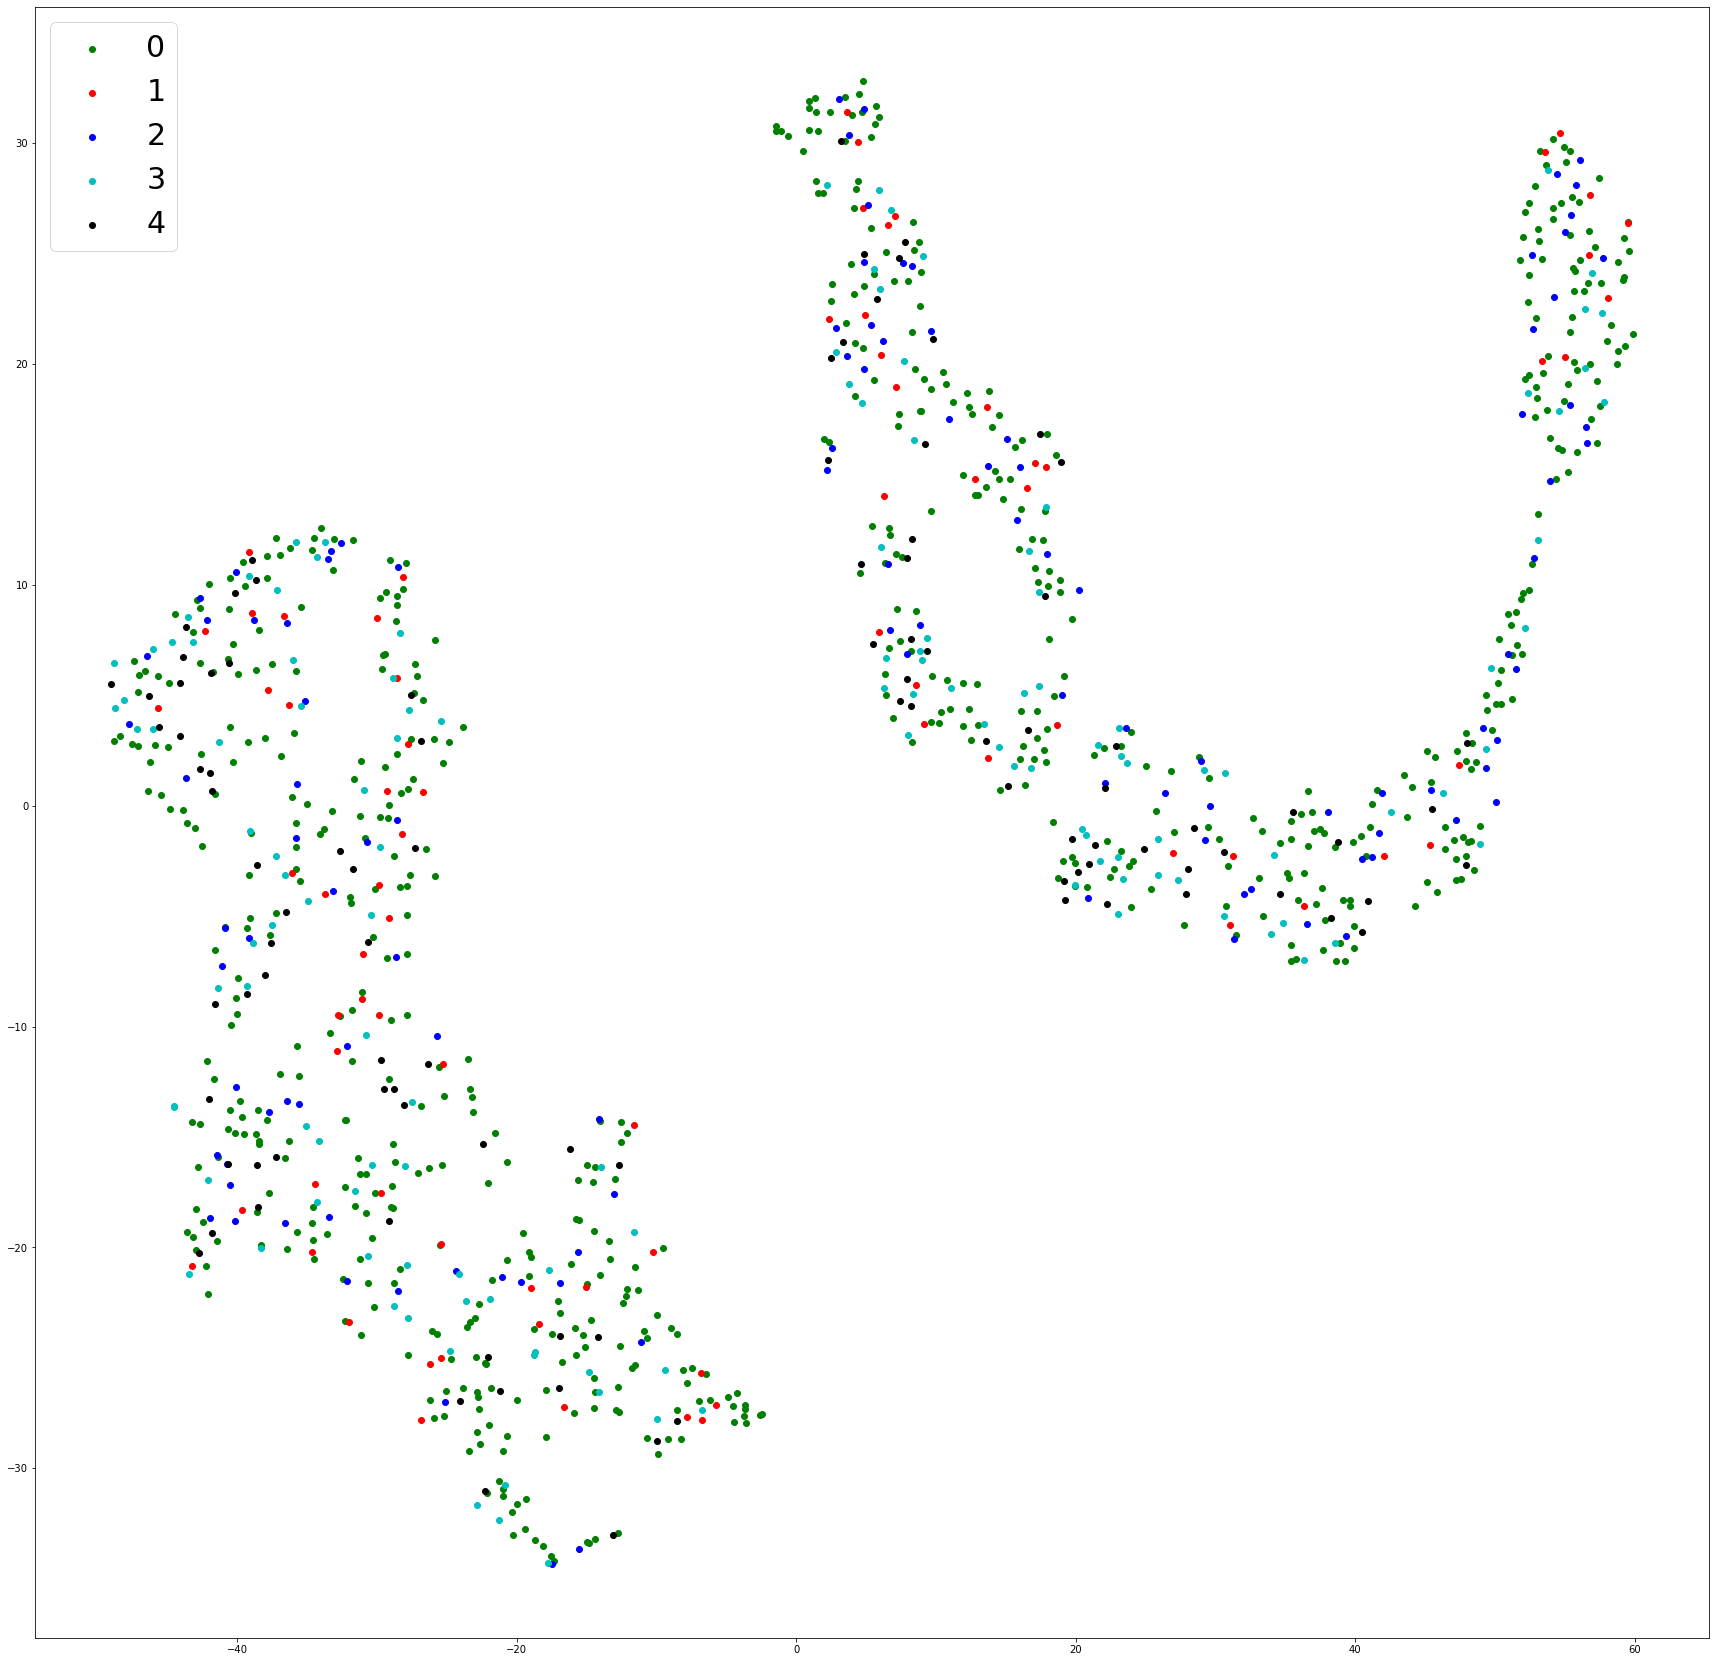

In [29]:
#filename = "/Users/y-nakamura/yugo_workspace/hand_scaling/data/clf_results/results_20210708/t-sne/force_acc_gyro.png"
sX = X_r
sY1 = y_r

stsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)
sX_embedded = stsne.fit_transform(sX)

df_tsne = pd.DataFrame(sX_embedded, columns = ['col1', 'col2'])

sddf = pd.concat([df_tsne, df_feature.label], axis = 1)

colors =  ["g", "r", "b", "c", "k"]
plt.figure(figsize = (30, 30))
for i , v in enumerate(np.unique(sddf.label.values)):
    tmp_df = sddf[sddf.label== v]
    plt.scatter(tmp_df['col1'],  
                tmp_df ['col2'],
                label = v,
                color = colors[i])

plt.legend(fontsize = 30)

#plt.savefig(filename, bbox_inches="tight", pad_inches=0.05)


In [73]:
scaler = StandardScaler()
clf = LGBMClassifier()

pipeline = make_pipeline(scaler, clf)

cv = StratifiedKFold(10)
y_pred = cross_val_predict(pipeline, X_r, y_r,
                                   cv=cv,
                                   n_jobs=7, verbose=1)

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   8 out of  10 | elapsed:    3.3s remaining:    0.8s
[Parallel(n_jobs=7)]: Done  10 out of  10 | elapsed:    3.4s finished


In [76]:
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression', # 目的 : 回帰  
        'metric': {'rmse'}, # 評価指標 : rsme(平均二乗誤差の平方根) 
}

In [77]:
model = clf.train(params, X_r, y_r)

AttributeError: 'LGBMClassifier' object has no attribute 'train'

In [78]:
from sklearn.model_selection import cross_validate

In [86]:
clf=LGBMClassifier()
output = cross_validate(clf, X_r, y_r, cv=10, scoring = 'accuracy', return_estimator =True)

In [88]:
estimator

LGBMClassifier()

In [89]:
for idx,estimator in enumerate(output['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = features_list,
                                        columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

Features sorted by their score for estimator 0:
                        importance
acc_f-BandsEnergyOld-5         362
acc_t-Correlation-2            331
acc_f-STD-3                    329
acc_f-MeanFreq-1               300
acc_f-BandsEnergyOld-4         282
...                            ...
acc_t-ARCoeff-6                  0
acc_f-MaxInds-3                  0
acc_f-MaxInds-2                  0
acc_t-ARCoeff-7                  0
acc_f-Kurtosis-mag               0

[145 rows x 1 columns]
Features sorted by their score for estimator 1:
                        importance
acc_f-BandsEnergyOld-5         313
acc_f-STD-3                    307
acc_t-Correlation-2            251
acc_f-BandsEnergyOld-4         240
acc_f-MeanFreq-1               235
...                            ...
acc_t-ARCoeff-1                  0
acc_t-ropy-2                     0
acc_f-MaxInds-2                  0
acc_f-MaxInds-3                  0
acc_f-Kurtosis-mag               0

[145 rows x 1 columns]
Features sorted 

In [92]:
output

{'fit_time': array([0.45081091, 0.53210592, 0.45235014, 0.45966601, 0.43429232,
        0.64117193, 0.44272709, 0.43410778, 0.49083495, 0.44182396]),
 'score_time': array([0.00110412, 0.00081515, 0.00083184, 0.00081897, 0.00080895,
        0.00087309, 0.00079083, 0.00085521, 0.00077224, 0.00077605]),
 'estimator': [LGBMClassifier(),
  LGBMClassifier(),
  LGBMClassifier(),
  LGBMClassifier(),
  LGBMClassifier(),
  LGBMClassifier(),
  LGBMClassifier(),
  LGBMClassifier(),
  LGBMClassifier(),
  LGBMClassifier()],
 'test_score': array([0.94915254, 0.88135593, 0.79661017, 0.93220339, 0.88135593,
        0.84745763, 0.82758621, 0.89655172, 0.96551724, 0.86206897])}

In [105]:
estimator.feature_importances_

array([222, 227, 169,  54,  50,  14,  66,  18,  85,  73,  74, 107, 105,
        23, 138, 179,  32,  82, 118, 130,  40,  45,  85,   0,   1,   0,
         0,   0,   0,   0,   0,   0,   0,  16,   2,   0,   5, 155, 266,
       133,  58,  33,  71,  81, 145,   0,   3,  50,  45,   0,   0,   0,
         0,  23,  61,  30,  66, 165, 359,  90,  62,  79, 114,  50,  96,
       223, 257, 140,  75,   6,  52, 136, 122, 122, 149,  24,  33,  26,
        38,   0,   0, 291,  52,  32,  82,  99,  31,  72,   0,   7, 120,
        71,  73, 168, 367, 133, 103, 116,  48,  72, 143,  69,   9, 119,
        34, 125,  34,  73,  62, 143,  78, 114,  11,  59,  54,  45,   6,
        52,  85, 190,  17, 119,  94, 187, 102,  75, 121,  22,  87,  59,
        83,  37,  91,  40,  59,   0, 261,   0,   1,  45,  48,   0,  39,
        48,   0], dtype=int32)

In [106]:
features_list

['acc_t-Mean-1',
 'acc_t-Mean-2',
 'acc_t-Mean-3',
 'acc_t-STD-1',
 'acc_t-STD-2',
 'acc_t-STD-3',
 'acc_t-Mad-1',
 'acc_t-Mad-2',
 'acc_t-Mad-3',
 'acc_t-Max-1',
 'acc_t-Max-2',
 'acc_t-Max-3',
 'acc_t-Min-1',
 'acc_t-Min-2',
 'acc_t-Min-3',
 'acc_t-SMA-1',
 'acc_t-Energy-1',
 'acc_t-Energy-2',
 'acc_t-Energy-3',
 'acc_t-IQR-1',
 'acc_t-IQR-2',
 'acc_t-IQR-3',
 'acc_t-ropy-1',
 'acc_t-ropy-2',
 'acc_t-ropy-3',
 'acc_t-ARCoeff-1',
 'acc_t-ARCoeff-2',
 'acc_t-ARCoeff-3',
 'acc_t-ARCoeff-4',
 'acc_t-ARCoeff-5',
 'acc_t-ARCoeff-6',
 'acc_t-ARCoeff-7',
 'acc_t-ARCoeff-8',
 'acc_t-ARCoeff-9',
 'acc_t-ARCoeff-10',
 'acc_t-ARCoeff-11',
 'acc_t-ARCoeff-12',
 'acc_t-Correlation-1',
 'acc_t-Correlation-2',
 'acc_t-Correlation-3',
 'acc_t-Mean-mag',
 'acc_t-STD-mag',
 'acc_t-Mad-mag',
 'acc_t-Max-mag',
 'acc_t-Min-mag',
 'acc_t-SMA-mag',
 'acc_t-Energy-mag',
 'acc_t-IQR-mag',
 'acc_t-ropy-mag',
 'acc_t-ARCoeff-mag1',
 'acc_t-ARCoeff-mag2',
 'acc_t-ARCoeff-mag3',
 'acc_t-ARCoeff-mag4',
 'acc_f-Mea

In [ ]:
cols = list(df.drop('CRIM',axis=1).columns)         # 特徴量名のリスト(目的変数CRIM以外)
f_importance = np.array(model.feature_importance()) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance)  # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

In [109]:
cols = features_list         # 特徴量名のリスト(目的変数CRIM以外)
f_importance = np.array(estimator.feature_importances_) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance)  # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

,feature,importance
94,acc_f-BandsEnergyOld-5,0.033747
58,acc_f-STD-3,0.033011
81,acc_f-MeanFreq-1,0.026759
38,acc_t-Correlation-2,0.024460
136,acc_f-Min-mag,0.024000
...,...,...
52,acc_t-ARCoeff-mag4,0.000000
23,acc_t-ropy-2,0.000000
79,acc_f-MaxInds-2,0.000000
80,acc_f-MaxInds-3,0.000000


In [111]:
df_importance.to_csv('feature_importance.csv')

In [112]:
os.getcwd()

'/Users/y-nakamura/yugo_workspace/bar_exercise/data/features/2021_dpsws'

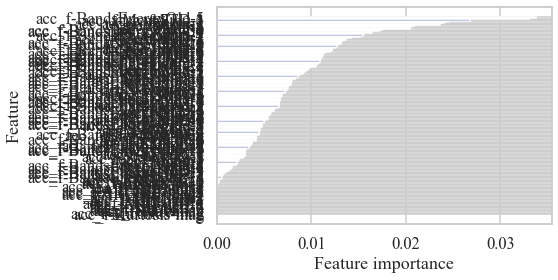

In [108]:
plot_feature_importance(df_importance)

In [31]:
model = LGBMClassifier()
model.fit( X_r, y_r)

LGBMClassifier()

In [32]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
y_pred = model.predict_proba(X)
y_pred 

array([[9.99981259e-01, 8.62731462e-06, 6.72516893e-07, 8.49597955e-06,
        9.44959989e-07],
       [9.99992150e-01, 1.95977032e-06, 4.63837736e-07, 4.23350776e-06,
        1.19316336e-06],
       [9.99997855e-01, 2.08477064e-07, 1.86195800e-07, 1.46218451e-06,
        2.87905002e-07],
       ...,
       [9.99967607e-01, 1.97082051e-05, 2.50169417e-06, 5.67856336e-06,
        4.50459078e-06],
       [9.99983435e-01, 9.41470738e-06, 1.13896267e-06, 2.67194472e-06,
        3.33930481e-06],
       [9.99918139e-01, 6.56001625e-05, 3.10087600e-06, 5.41787240e-06,
        7.74216479e-06]])

In [37]:
y_pred_max = np.argmax(y_pred, axis=1)
y_pred_max 

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
cr_dict =  classification_report(y,y_pred_max, output_dict=True)
cr_df = pd.DataFrame(cr_dict).T
cm = confusion_matrix(y,y_pred_max,  labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

In [39]:
cr_df

,precision,recall,f1-score,support
0,1.000000,0.807229,0.893333,1245.000000
1,0.862434,1.000000,0.926136,163.000000
2,0.922509,1.000000,0.959693,250.000000
3,0.734072,1.000000,0.846645,265.000000
4,0.677741,1.000000,0.807921,204.000000
accuracy,0.887165,0.887165,0.887165,0.887165
macro avg,0.839351,0.961446,0.886746,2127.000000
weighted avg,0.916310,0.887165,0.889638,2127.000000


In [43]:
# cr_dict =  classification_report(y_r, y_pred, output_dict=True)
# cr_df = pd.DataFrame(cr_dict).T
# cm = confusion_matrix(y_r, y_pred, labels=labels)
# cm_df = pd.DataFrame(cm, index=labels, columns=labels)

In [44]:
# cr_df

In [45]:
index_name="True Label"
columns_name="Estimated Label"
index=labels
columns=labels
figure_size=(14, 11)
fontsize=20
font="Times New Roman"

<AxesSubplot:xlabel='Estimated label', ylabel='True label'>

<Figure size 432x288 with 0 Axes>

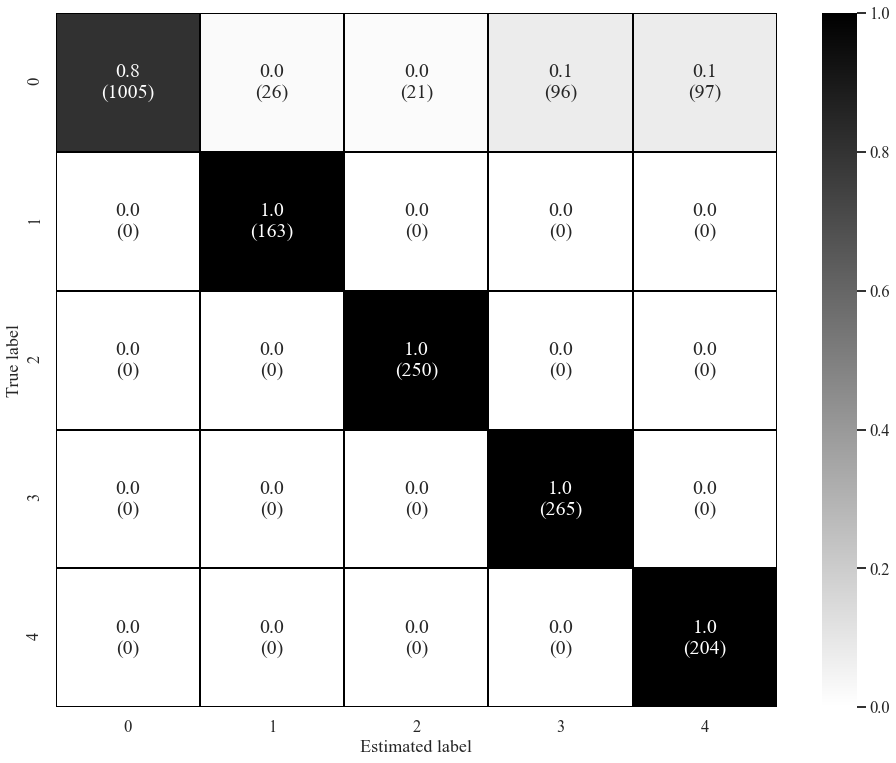

In [46]:
df = cm_df 
cm2 = pd.DataFrame(df, index=index, columns=columns)
cm3 = cm2.astype('float').div(cm2.sum(axis=1), axis="index")
cm3_object = pd.DataFrame(cm3.values, index=index, columns=columns, dtype=str)

for i in range(cm3_object.shape[0]):
    for j in range(cm3_object.shape[1]):
        cm3_object.iat[i, j] = "{0:.1f}".format(cm3.iat[i, j]) + "\n" + "(" + str(cm2.iat[i, j]) + ")"

cm3.index.name = "True label"
cm3.columns.name = "Estimated label"
sns.set()
sns.set('talk', 'whitegrid', 'dark', font_scale=1)

plt.figure()
plt.rcParams["font.size"] = fontsize
plt.rcParams['font.family'] = font
plt.figure(figsize=figure_size)
plt.xlabel('Predict')
plt.ylabel('Actual')

#     plt.subplots_adjust(bottom=bottom, top=top, left=left, right=right)
plt.tight_layout()
#     plt.subplots_adjust()

sns.heatmap(cm3, annot=cm3_object.values, fmt="", linewidth=2, cmap="gray_r", linecolor="black", vmax=1, vmin=0)


#plt.savefig(filename, bbox_inches="tight", pad_inches=0.05)
#plt.close("all")

In [103]:
model = LGBMClassifier()
model.fit( X_r, y_r)

y

y_pred = model.predict_proba(X)
y_pred 

y_pred_max = np.argmax(y_pred, axis=1)
y_pred_max 

cr_dict =  classification_report(y,y_pred_max, output_dict=True)
cr_df = pd.DataFrame(cr_dict).T
cm = confusion_matrix(y,y_pred_max,  labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

cr_df

,precision,recall,f1-score,support
0,1.000000,0.808032,0.893825,1245.000000
1,0.876344,1.000000,0.934097,163.000000
2,0.908759,0.996000,0.950382,250.000000
3,0.736111,1.000000,0.848000,265.000000
4,0.677741,1.000000,0.807921,204.000000
accuracy,0.887165,0.887165,0.887165,0.887165
macro avg,0.839791,0.960806,0.886845,2127.000000
weighted avg,0.916014,0.887165,0.889610,2127.000000


<AxesSubplot:xlabel='Estimated label', ylabel='True label'>

<Figure size 432x288 with 0 Axes>

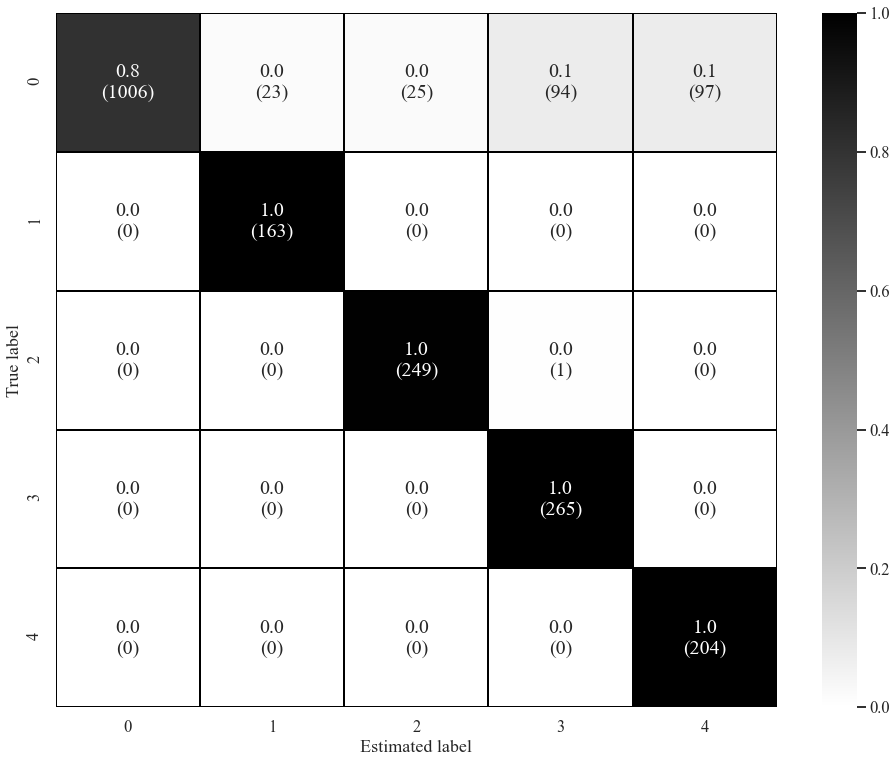

In [104]:
df = cm_df 
cm2 = pd.DataFrame(df, index=index, columns=columns)
cm3 = cm2.astype('float').div(cm2.sum(axis=1), axis="index")
cm3_object = pd.DataFrame(cm3.values, index=index, columns=columns, dtype=str)

for i in range(cm3_object.shape[0]):
    for j in range(cm3_object.shape[1]):
        cm3_object.iat[i, j] = "{0:.1f}".format(cm3.iat[i, j]) + "\n" + "(" + str(cm2.iat[i, j]) + ")"

cm3.index.name = "True label"
cm3.columns.name = "Estimated label"
sns.set()
sns.set('talk', 'whitegrid', 'dark', font_scale=1)

plt.figure()
plt.rcParams["font.size"] = fontsize
plt.rcParams['font.family'] = font
plt.figure(figsize=figure_size)
plt.xlabel('Predict')
plt.ylabel('Actual')

#     plt.subplots_adjust(bottom=bottom, top=top, left=left, right=right)
plt.tight_layout()
#     plt.subplots_adjust()

sns.heatmap(cm3, annot=cm3_object.values, fmt="", linewidth=2, cmap="gray_r", linecolor="black", vmax=1, vmin=0)


#plt.savefig(filename, bbox_inches="tight", pad_inches=0.05)
#plt.close("all")